The real car price = $31,120

In [ ]:
"""Car Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/118dTCKk6ewcKPN_wz7IiO_zY6puwS8bq
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

df=pd.read_csv('/content/drive/MyDrive/Python 4th sem/data.csv')

df.head()

df.shape

df.columns= df.columns.str.lower().str.replace(' ','_')
string_columns=list(df.dtypes[df.dtypes=='object'].index)

for col in string_columns:
  df[col]=df[col].str.lower().str.replace(' ','_')

df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


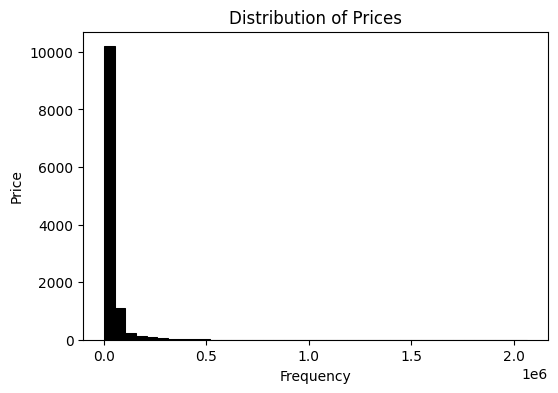

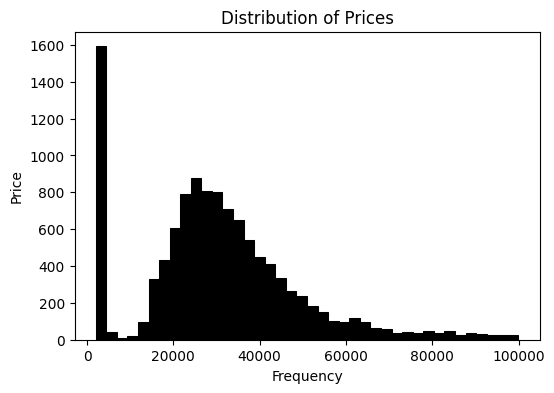

<function matplotlib.pyplot.show(close=None, block=None)>

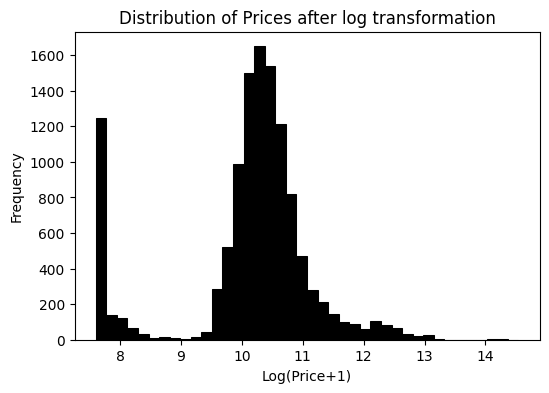

In [ ]:
"""Exploratory data analysis"""

plt.figure(figsize=(6,4))

sns.histplot(df.msrp, bins=40, color='black',alpha=1)
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show

plt.figure(figsize=(6,4))

sns.histplot(df.msrp[df.msrp<100000], bins=40, color='black',alpha=1)
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

log_price=np.log1p(df.msrp)
plt.figure(figsize=(6,4))

sns.histplot(log_price, bins=40, color='black',alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price+1)')
plt.title('Distribution of Prices after log transformation')
plt.show

In [ ]:
# Checking for missing values in the dataset
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
df.shape

(11914, 16)

In [ ]:
# Removing rows with any null values
df.dropna(inplace=True)

In [ ]:
df.shape

(8084, 16)

In [ ]:
# Removing rows with 'unknown' values in 'transmission_type'
df = df[df['transmission_type'] != 'unknown']

In [ ]:
df.shape

(8081, 16)

In [ ]:
# Getting a statistical summary of the dataset
df.describe(include='all')

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
count,8081,8081,8081.000000,8081,8081.000000,8081.000000,8081,8081,8081.000000,8081,8081,8081,8081.000000,8081.000000,8081.000000,8.081000e+03
unique,47,712,NaN,8,NaN,NaN,4,4,NaN,70,3,16,NaN,NaN,NaN,NaN
top,chevrolet,f-150,NaN,regular_unleaded,NaN,NaN,automatic,front_wheel_drive,NaN,crossover,midsize,4dr_suv,NaN,NaN,NaN,NaN
freq,614,122,NaN,3504,NaN,NaN,5761,2879,NaN,1103,3184,2093,NaN,NaN,NaN,NaN
mean,NaN,NaN,2012.063111,NaN,274.631481,5.777255,NaN,NaN,3.414676,NaN,NaN,NaN,26.652271,19.555377,1499.876500,5.008825e+04
std,NaN,NaN,6.314879,NaN,115.023335,1.885952,NaN,NaN,0.897840,NaN,NaN,NaN,7.721585,7.160756,1413.899709,7.030151e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2010.000000,NaN,192.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.593500e+04
50%,NaN,NaN,2015.000000,NaN,264.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1013.000000,3.501000e+04
75%,NaN,NaN,2016.000000,NaN,320.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.874500e+04


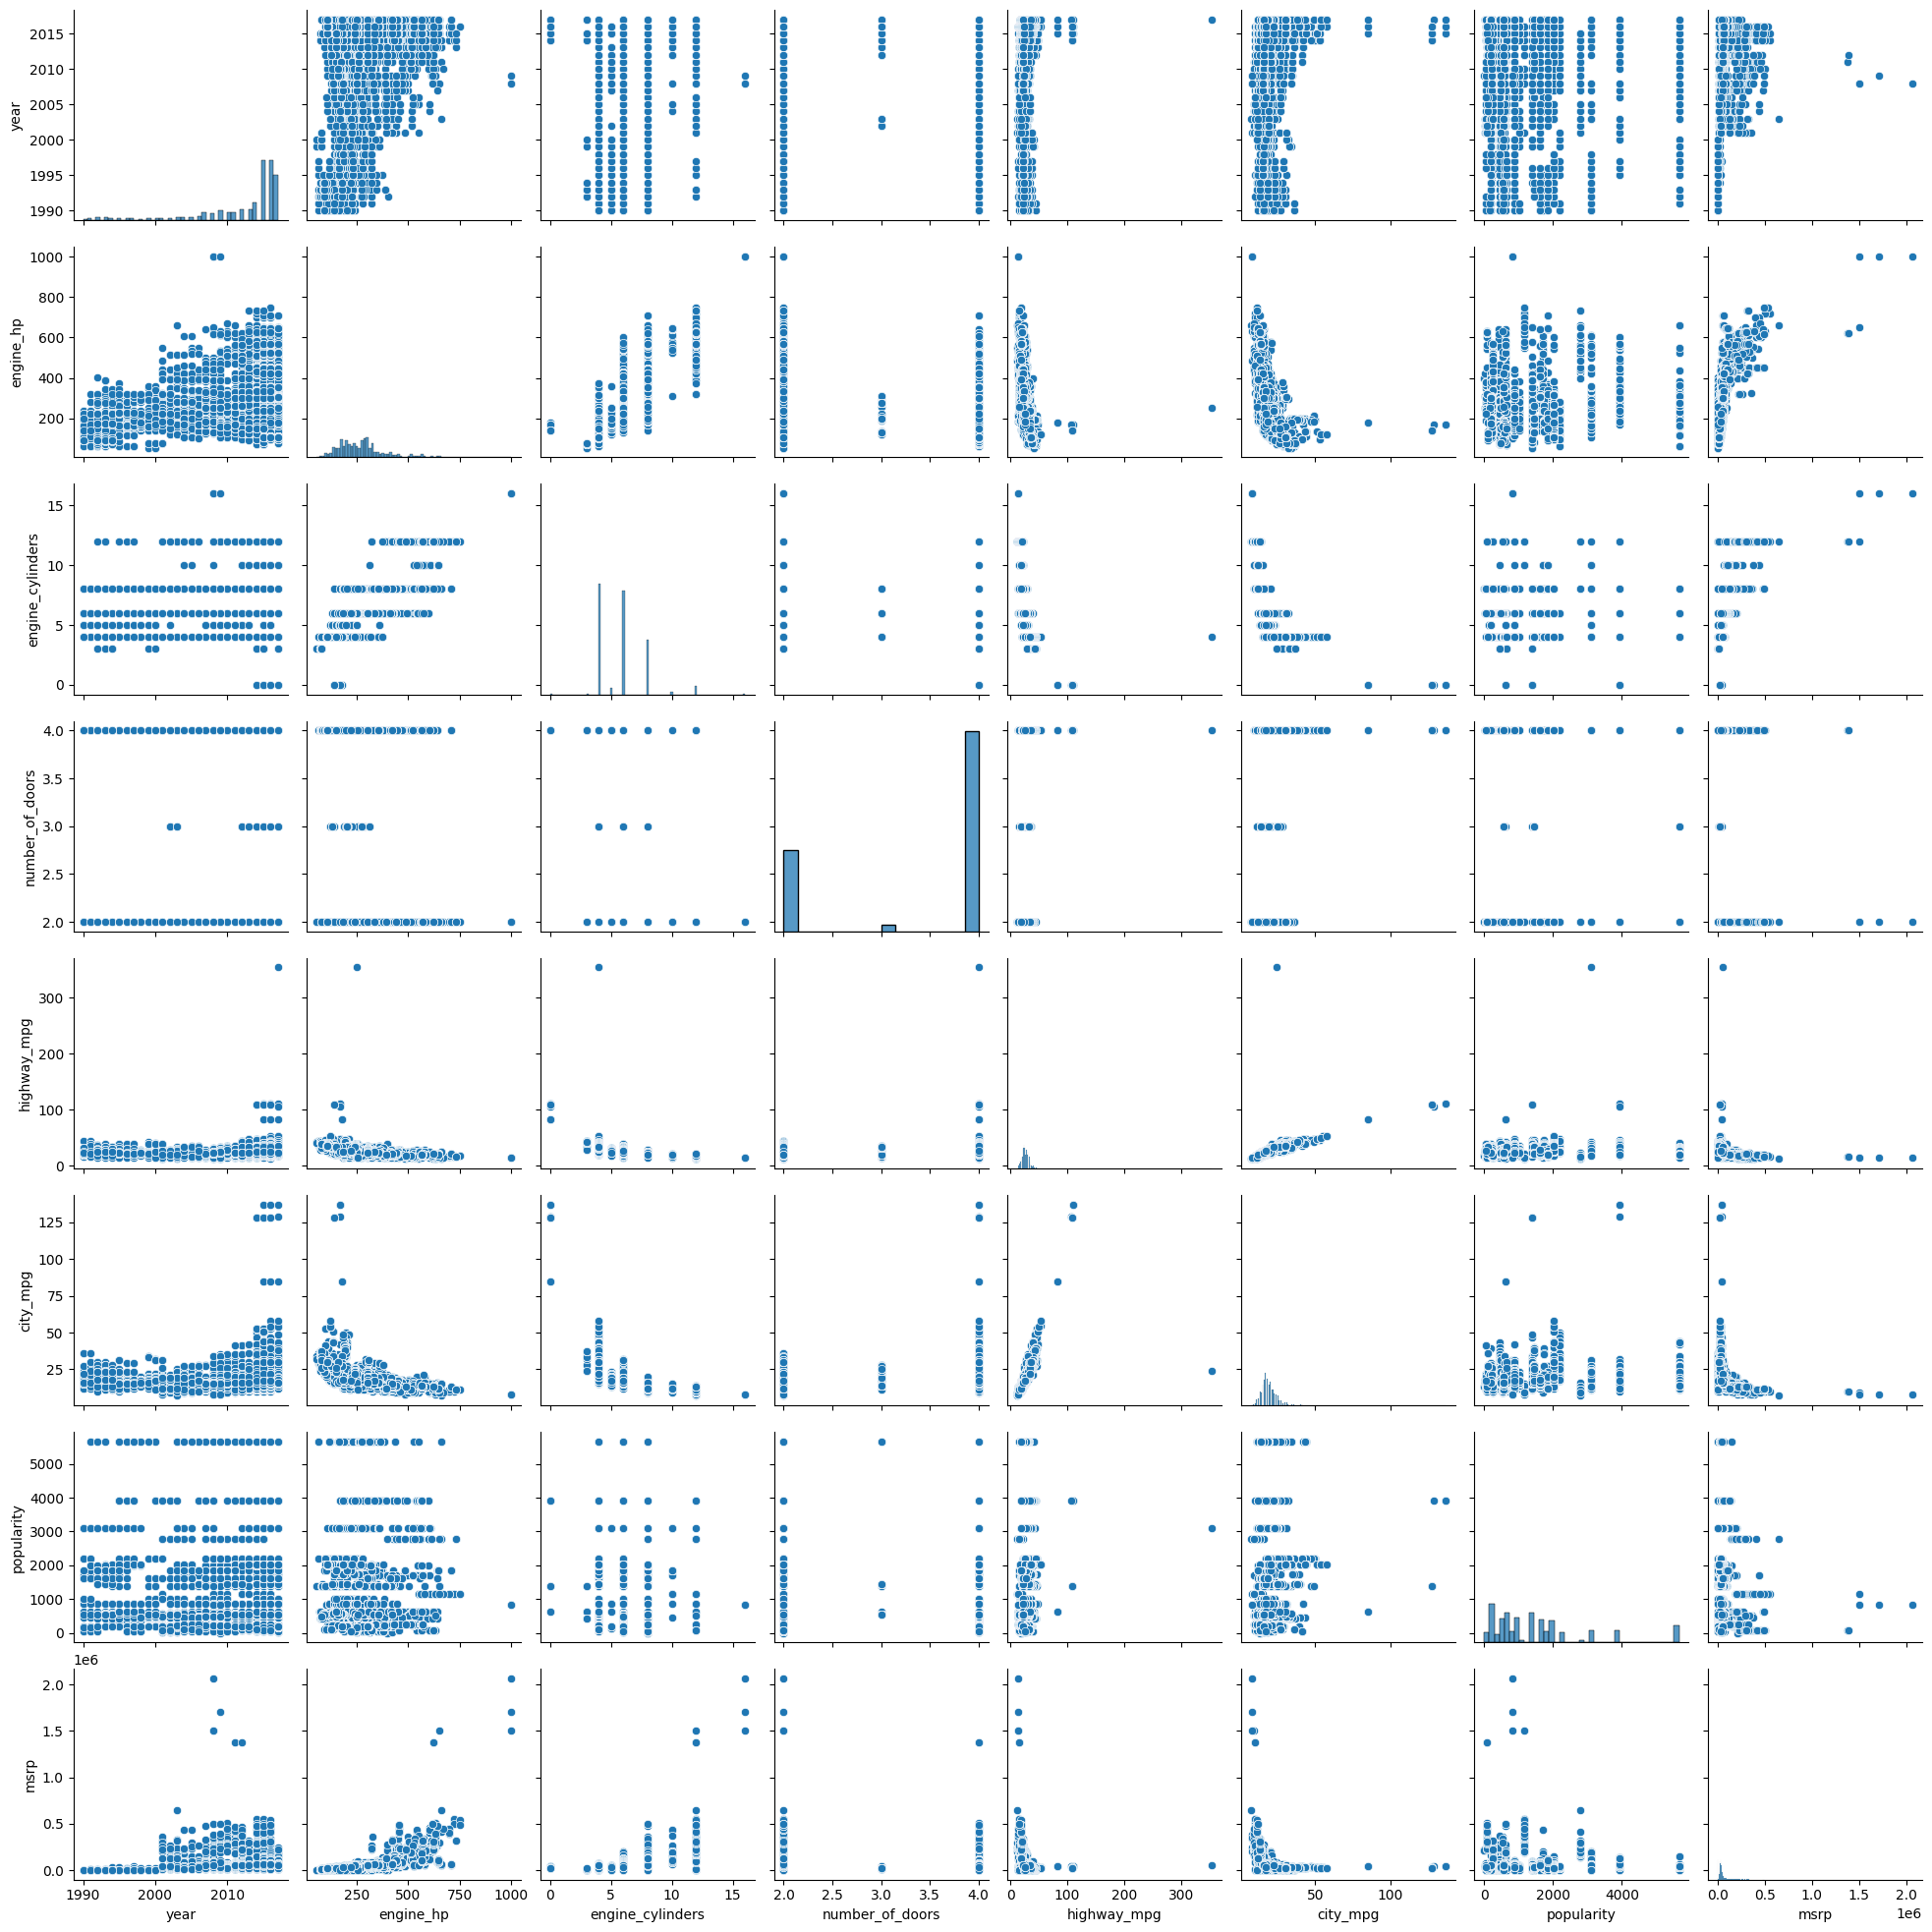

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

In [ ]:
df_clean=df

In [ ]:
# Selecting specific columns
selected_columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
base = df[selected_columns]
X = base

# Applying log transformation to the target variable
log_price = np.log1p(df.msrp)
y = log_price

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
import numpy as np

def rmse(y, y_pred):
    error = y_pred-y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [ ]:
rmse_initial = rmse(y_test, y_pred)
print(f'Initial RMSE: {rmse_initial}')

Initial RMSE: 0.6633905672979451


In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

rmse_value = rmse(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse_value}')

Root Mean Squared Error (RMSE): 0.6633905672979451


#1. Initial Root Mean Squared Error (RMSE): 0.6633905672979451

In [ ]:
df.shape

(8081, 16)

In [ ]:
base.shape

(8081, 5)

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
X.shape

(8081, 5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def prepare_X(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
    features = base.copy()

    # Adding 'age' feature
    df['age'] = 2017 - df['year']
    features.append('age')

    # Process categorical features with Label Encoding
    categorical_columns = {
        'make': ['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
                 'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'mclaren',
                 'maybach', 'porsche', 'toyota', 'saab', 'gmc', 'hyundai', 'honda',
                 'cadillac', 'bentley', 'ford', 'oldsmobile', 'chevrolet', 'dodge',
                 'lamborghini', 'lincoln', 'pontiac', 'subaru', 'volkswagen',
                 'spyker', 'kia', 'acura', 'plymouth', 'rolls-royce', 'maserati',
                 'lexus', 'aston_martin', 'land_rover', 'lotus', 'buick',
                 'infiniti', 'scion', 'genesis', 'suzuki', 'hummer', 'bugatti'],
        'engine_fuel_type': ['premium_unleaded_(required)', 'regular_unleaded',
                             'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)',
                             'diesel', 'electric',
                             'flex-fuel_(premium_unleaded_recommended/e85)', 'natural_gas',
                             'flex-fuel_(premium_unleaded_required/e85)',
                             'flex-fuel_(unleaded/natural_gas)'],
        'transmission_type': ['manual', 'automatic', 'automated_manual', 'direct_drive'],
        'driven_wheels': ['rear_wheel_drive', 'front_wheel_drive', 'all_wheel_drive', 'four_wheel_drive'],
        'market_category': ['factory_tuner,luxury,high-performance', 'luxury,performance',
                             'luxury,high-performance', 'luxury', 'performance', 'flex_fuel',
                             'flex_fuel,performance', 'hatchback',
                             'hatchback,luxury,performance', 'hatchback,luxury',
                             'luxury,high-performance,hybrid', 'diesel,luxury',
                             'hatchback,performance', 'hatchback,factory_tuner,performance',
                             'high-performance', 'factory_tuner,high-performance',
                             'exotic,high-performance', 'exotic,factory_tuner,high-performance',
                             'factory_tuner,performance', 'crossover', 'exotic,luxury',
                             'exotic,luxury,high-performance', 'exotic,luxury,performance',
                             'factory_tuner,luxury,performance', 'flex_fuel,luxury',
                             'crossover,luxury', 'hatchback,factory_tuner,luxury,performance',
                             'crossover,hatchback', 'hybrid', 'luxury,performance,hybrid',
                             'crossover,luxury,performance,hybrid',
                             'crossover,luxury,performance',
                             'exotic,factory_tuner,luxury,high-performance',
                             'flex_fuel,luxury,high-performance', 'crossover,flex_fuel',
                             'diesel', 'hatchback,diesel', 'crossover,luxury,diesel',
                             'crossover,luxury,high-performance',
                             'exotic,flex_fuel,factory_tuner,luxury,high-performance',
                             'exotic,flex_fuel,luxury,high-performance',
                             'exotic,factory_tuner,luxury,performance', 'hatchback,hybrid',
                             'crossover,hybrid', 'hatchback,luxury,hybrid',
                             'flex_fuel,luxury,performance', 'crossover,performance',
                             'luxury,hybrid', 'crossover,flex_fuel,luxury,performance',
                             'crossover,flex_fuel,luxury', 'crossover,flex_fuel,performance',
                             'hatchback,factory_tuner,high-performance', 'hatchback,flex_fuel',
                             'factory_tuner,luxury',
                             'crossover,factory_tuner,luxury,high-performance',
                             'crossover,factory_tuner,luxury,performance',
                             'crossover,hatchback,factory_tuner,performance',
                             'crossover,hatchback,performance', 'flex_fuel,hybrid',
                             'flex_fuel,performance,hybrid',
                             'crossover,exotic,luxury,high-performance',
                             'crossover,exotic,luxury,performance',
                             'exotic,luxury,high-performance,hybrid', 'crossover,luxury,hybrid',
                             'flex_fuel,factory_tuner,luxury,high-performance',
                             'performance,hybrid', 'crossover,factory_tuner,performance',
                             'crossover,diesel', 'flex_fuel,diesel',
                             'crossover,hatchback,luxury'],
        'vehicle_size': ['compact', 'midsize', 'large'],
        'vehicle_style': ['coupe', 'convertible', 'sedan', 'wagon', '4dr_hatchback',
                          '2dr_hatchback', '4dr_suv', 'crew_cab_pickup',
                          'extended_cab_pickup', 'regular_cab_pickup', 'passenger_minivan',
                          'cargo_minivan', '2dr_suv', 'convertible_suv', 'cargo_van',
                          'passenger_van'],
        'number_of_doors': ['2', '3', '4']
    }

    # Apply label encoding
    le = LabelEncoder()
    for col, values in categorical_columns.items():
        df[col] = df[col].astype(str)  # Ensure the column is in string format
        le.fit(values)  # Fit on known values
        df[col] = le.transform(df[col])  # Transform values to integers
        features.append(col)

    # Print the list of features being added
    print("Features being added:", features)

    # Selecting and preparing numerical features
    df_num = df[features]
    df_num = df_num.fillna(0)  # Fill missing values with 0
    return df_num


In [ ]:
X = prepare_X(df)
print(X)

Features being added: ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'number_of_doors']
       engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity  age  \
0          335.0               6.0           26        19        3916    6   
1          300.0               6.0           28        19        3916    6   
2          300.0               6.0           28        20        3916    6   
3          230.0               6.0           28        18        3916    6   
4          230.0               6.0           28        18        3916    6   
...          ...               ...          ...       ...         ...  ...   
11909      300.0               6.0           23        16         204    5   
11910      300.0               6.0           23        16         204    5   
11911      300.0               6.0           23        16

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
rmse_value = rmse(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse_value}')

Root Mean Squared Error (RMSE): 0.4555687367913596


#After feature engineering & Encoding Root Mean Squared Error (RMSE): 0.45556873679135956


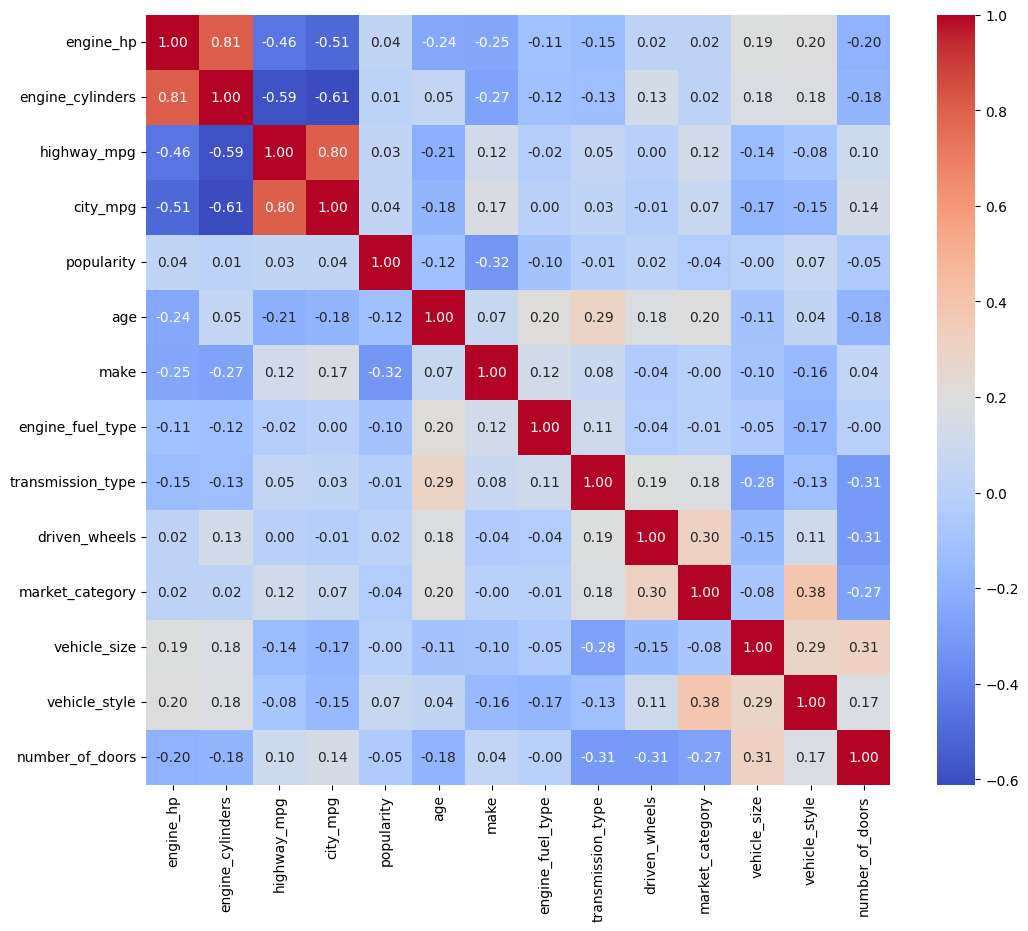

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [ ]:
# Split data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)


engine_hp            float64
engine_cylinders     float64
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
make                   int64
engine_fuel_type       int64
transmission_type      int64
driven_wheels          int64
market_category        int64
vehicle_size           int64
vehicle_style          int64
number_of_doors        int64
dtype: object
float64


In [ ]:
import numpy as np

def linear_regression_reg(X, y, r=0.0):
    m, n = X.shape
    # Add bias term
    X = np.hstack([np.ones((m, 1)), X])

    # Regularization matrix
    I = np.eye(n + 1)
    I[0, 0] = 0  # No regularization for bias term

    # Ridge Regression (L2 regularization)
    A = X.T.dot(X) + r * I
    b = X.T.dot(y)
    w = np.linalg.solve(A, b)

    return w[0], w[1:]


In [ ]:
for r in [0, 0.001, 0.01, 0.1, 1, 10, 15]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)

    # Predictions
    y_pred_val = w_0 + X_val.dot(w)
    print(f'Validation RMSE for r={r}:', rmse(y_val, y_pred_val))

    y_pred_test = w_0 + X_test.dot(w)
    print(f'Test RMSE for r={r}:', rmse(y_test, y_pred_test))


Validation RMSE for r=0: 0.45624937516575415
Test RMSE for r=0: 0.4624610054781259
Validation RMSE for r=0.001: 0.4562493740573679
Test RMSE for r=0.001: 0.46246100287316916
Validation RMSE for r=0.01: 0.45624936408213485
Test RMSE for r=0.01: 0.46246097942880393
Validation RMSE for r=0.1: 0.45624926435369256
Test RMSE for r=0.1: 0.46246074500947515
Validation RMSE for r=1: 0.4562482694566559
Test RMSE for r=1: 0.46245840324714726
Validation RMSE for r=10: 0.45623855779710937
Test RMSE for r=10: 0.46243522741360366
Validation RMSE for r=15: 0.45623334720922976
Test RMSE for r=15: 0.46242254038885733


In [ ]:
import numpy as np
import pandas as pd

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Linear Regression with Regularization
def linear_regression_reg(X, y, r=0.0):
    m, n = X.shape
    # Add bias term
    X = np.hstack([np.ones((m, 1)), X])

    # Regularization matrix
    I = np.eye(n + 1)
    I[0, 0] = 0  # No regularization for bias term

    # Ridge Regression (L2 regularization)
    A = X.T.dot(X) + r * I
    b = X.T.dot(y)
    w = np.linalg.solve(A, b)

    return w[0], w[1:]

# Load and prepare your dataset
# df = pd.read_csv('your_dataset.csv')
# Assuming df is your DataFrame
# prepare_X function as defined previously

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X = prepare_X(df)
# Applying log transformation to the target variable
y

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Train the model with different regularization parameters
for r in [0, 0.001, 0.01, 0.1, 1, 10, 15]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)

    # Predictions
    y_pred_val = w_0 + X_val.dot(w)
    print(f'Validation RMSE for r={r}:', rmse(y_val, y_pred_val))

    y_pred_test = w_0 + X_test.dot(w)
    print(f'Test RMSE for r={r}:', rmse(y_test, y_pred_test))

# After generalizing, you can use the model to predict car prices
# Choose the regularization parameter with the best performance, e.g., r=0.01
best_r = 0.01
w_0, w = linear_regression_reg(X_train, y_train, r=best_r)

# Function to predict the price of a car given its features
def predict_price(features_dict):
    # Create a DataFrame for the input features
    input_df = pd.DataFrame([features_dict])

    # Prepare the input features
    X_input = prepare_X(input_df)

    # Ensure the input data has the same structure as the training data
    X_input = X_input[X.columns]

    # Make predictions
    price_pred = w_0 + X_input.dot(w)
    return price_pred[0]

# Example usage
features = {
    'engine_hp': 268.0,
    'engine_cylinders': 6.0,
    'highway_mpg': 25,
    'city_mpg': 18,
    'popularity': 2031,
    'year': 2013,  # This will be used to calculate 'age'
    'make': 'toyota',
    'engine_fuel_type': 'regular_unleaded',
    'transmission_type': 'automatic',
    'driven_wheels': 'all_wheel_drive',
    'market_category': 'crossover,performance',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'number_of_doors': '4.0'
}

predicted_price = predict_price(features)
print(f'The predicted price of the car is: ${predicted_price:.2f}')



Features being added: ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'number_of_doors']
Validation RMSE for r=0: 0.45624937516575415
Test RMSE for r=0: 0.4624610054781259
Validation RMSE for r=0.001: 0.4562493740573679
Test RMSE for r=0.001: 0.46246100287316916
Validation RMSE for r=0.01: 0.45624936408213485
Test RMSE for r=0.01: 0.46246097942880393
Validation RMSE for r=0.1: 0.45624926435369256
Test RMSE for r=0.1: 0.46246074500947515
Validation RMSE for r=1: 0.4562482694566559
Test RMSE for r=1: 0.46245840324714726
Validation RMSE for r=10: 0.45623855779710937
Test RMSE for r=10: 0.46243522741360366
Validation RMSE for r=15: 0.45623334720922976
Test RMSE for r=15: 0.46242254038885733
Features being added: ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'age', 'make', 'engine_fuel_type', 'transmission_type',

In [ ]:
np.exp(10.52)

37049.12449201164

#The actual price is 31,102 while the predicted price is 37,049 which is very much accurate